In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [68]:
properties_df = pd.read_csv('properties.csv')
properties_df

,PropertyID,Location,Size_sqft,SalePrice
0,2001,Suburb,2996,355372
1,2002,Downtown,2887,505830
2,2003,Suburb,957,338789
3,2004,Countryside,1814,419335
4,2005,Suburb,850,357301
...,...,...,...,...
95,2096,Countryside,2005,271942
96,2097,Suburb,2686,551317
97,2098,Countryside,1889,530264
98,2099,Downtown,1453,502089


## Analysis 

### Return on Investment Analysis

In [69]:
df = properties_df['Location'].unique()
df

array(['Suburb', 'Downtown', 'Countryside'], dtype=object)

In [70]:
rental_income_per_sqft = {
    'Suburb': 1.2,
    'Downtown': 1.8,
    'Countryside': 1.5
}

properties_df['Monthly_Rental_Income'] = properties_df.apply(lambda x: x['Size_sqft']*rental_income_per_sqft[x['Location']], axis=1)

In [71]:
properties_df['Annual_Rental'] = properties_df['Monthly_Rental_Income'] * 12

In [72]:
properties_df['Quaterly_Rental'] = properties_df['Monthly_Rental_Income'] * 3

In [73]:
properties_df['Semester_Rental'] = properties_df['Monthly_Rental_Income'] * 6

In [74]:
properties_df['ROI_Yearly'] = (properties_df['Annual_Rental']/properties_df['SalePrice']) * 100

In [75]:
properties_df['ROI_Quaterly'] = (properties_df['Quaterly_Rental']/properties_df['SalePrice']) * 100

In [76]:
properties_df['ROI_Semester'] = (properties_df['Semester_Rental']/properties_df['SalePrice']) * 100

In [77]:
properties_df

,PropertyID,Location,Size_sqft,SalePrice,Monthly_Rental_Income,Annual_Rental,Quaterly_Rental,Semester_Rental,ROI_Yearly,ROI_Quaterly,ROI_Semester
0,2001,Suburb,2996,355372,3595.2,43142.4,10785.6,21571.2,12.140067,3.035017,6.070034
1,2002,Downtown,2887,505830,5196.6,62359.2,15589.8,31179.6,12.328094,3.082024,6.164047
2,2003,Suburb,957,338789,1148.4,13780.8,3445.2,6890.4,4.067665,1.016916,2.033832
3,2004,Countryside,1814,419335,2721.0,32652.0,8163.0,16326.0,7.786615,1.946654,3.893307
4,2005,Suburb,850,357301,1020.0,12240.0,3060.0,6120.0,3.425683,0.856421,1.712842
...,...,...,...,...,...,...,...,...,...,...,...
95,2096,Countryside,2005,271942,3007.5,36090.0,9022.5,18045.0,13.271212,3.317803,6.635606
96,2097,Suburb,2686,551317,3223.2,38678.4,9669.6,19339.2,7.015637,1.753909,3.507819
97,2098,Countryside,1889,530264,2833.5,34002.0,8500.5,17001.0,6.412278,1.603069,3.206139
98,2099,Downtown,1453,502089,2615.4,31384.8,7846.2,15692.4,6.250844,1.562711,3.125422


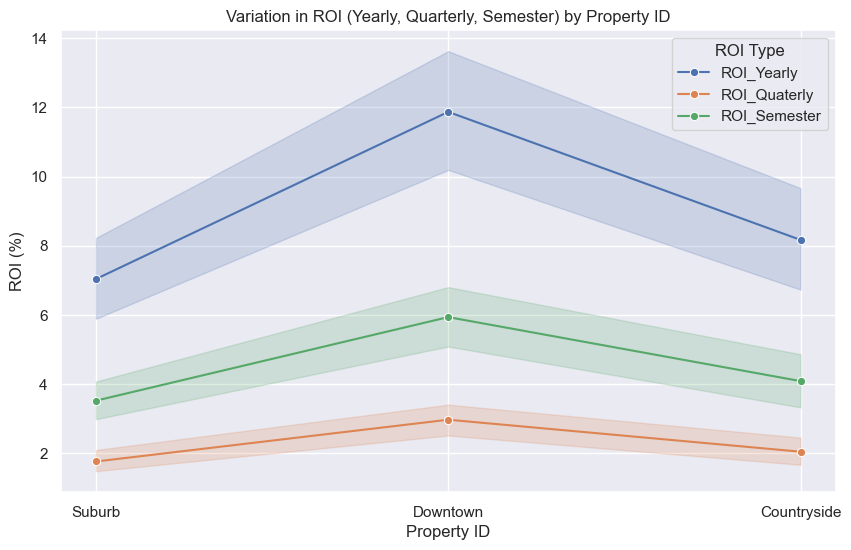

In [91]:
df_melted = properties_df.melt(id_vars=['Location'], value_vars=['ROI_Yearly', 'ROI_Quaterly', 'ROI_Semester'],
                    var_name='ROI_Type', value_name='ROI')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Location', y='ROI', hue='ROI_Type', marker='o')

plt.title('Variation in ROI (Yearly, Quarterly, Semester) by Property ID')
plt.xlabel('Property ID')
plt.ylabel('ROI (%)')
plt.legend(title='ROI Type')
plt.show()